In [1]:
import importlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

tips = sns.load_dataset('tips')
plt.style.use('dark_background')

In [2]:
colors = ["#59ffc5", "#ffed4f", "#19ffaf", "#00eaff", "#ffed4f", "#f67dff", "#ff59db", "#ff59db", "#fffba6", "cyan"]

In [43]:
import neona
importlib.reload(neona)

<module 'neona' from 'C:\\Users\\GIGABYTE\\Desktop\\3 Month Course\\PRACTICE\\Neona-project\\neona.py'>

In [7]:
def plot_configure(ax, spines_yn= True):
    for spine in ['left', 'right', 'top', 'bottom']:
        ax.spines[spine].set_visible(spines_yn)

In [8]:
def get_point(fig, point_size):
    fig_width_x_height = fig.get_figwidth() * fig.get_figheight()
    
    point_size *= 1_000
    patch_size = (point_size * fig_width_x_height) // 150
    decrease = (500 * patch_size) // 10_000
    point = (50 * patch_size) // 10_000

    size = np.arange(patch_size, 0, -decrease); gap = len(size)
    alpha = np.linspace(.05, .5, gap) ** 3
    return size, alpha, point

In [9]:
def get_lw(lw=15):
    # a = width and b = alpha
    a = np.arange(lw, 0, -4); gap = len(a)
    b = np.linspace(0, .3, gap)
    return a, b

In [5]:
def cycle_colors(color):
    return cycle([color]) if isinstance(color, str) else cycle(color)

# 

# Trial Area

In [26]:
df = pd.DataFrame(np.random.randint(0, 1000, (10, 4)))

<AxesSubplot:>

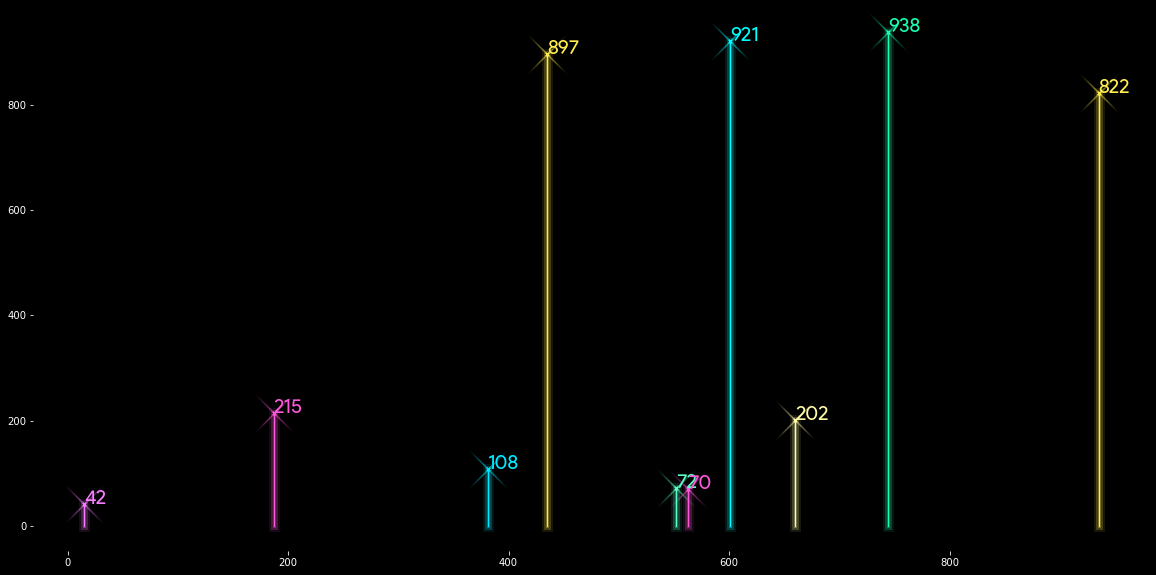

In [22]:
plt.figure(figsize= (20, 10))
barplot(df[0], df[1], spines=False,
        show_values=True, color=colors,
        point_marker='x',
        font_dict=dict(fontsize=20, fontfamily="product sans", color='r'))

# 

# BAR

In [15]:
def barplot(x, y, spines= True, point_size= 2, color= "#59ffc5",
            point_marker= 'o', font_dict= dict(),
            show_values= True, ax=None, lw=15):
    
    fig = plt.gcf()
    ax = ax or plt.gca()
    plot_configure(ax, spines_yn=spines)
    sizes, alphas, point = get_point(fig, point_size)
    a, b = get_lw(lw)
    
    colors = cycle_colors(color)
    for xi, yi in zip(x, y):
        colr = next(colors)
        for width, alpha in zip(a, b):
            ax.plot([xi, xi], [0, yi], lw= width, alpha= alpha, color= colr)
        ax.plot([xi, xi], [0, yi], lw= 1, alpha= 1, color= colr)
        
        for size, alpha in zip(sizes, alphas):
            ax.scatter(xi, yi, s= size, alpha= alpha, color= colr, marker= point_marker)
        ax.scatter(xi, yi, s= point, alpha= 1, color= colr, marker= point_marker)
        
    if show_values:
        colors = cycle_colors(color)
        for xi, yi in zip(x, y):
            colr = next(colors)
            font_dict['color'] = colr
            ax.text(xi, yi, str(yi), **font_dict)
            
    return ax

# 

# LINE

In [48]:
a = pd.Series([1, 3, 6])
isinstance(a, (pd.Series, pd.DataFrame)) and False

False

In [157]:
def lineplot(x, y= None, spines= True, figsize= None, point_size= 2,
             color= "#59ffc5", point_marker= 'o', font_dict= dict(),
             show_values= True, show_marks= True, ax=None, lw=15, legend=False, legend_label=None):
    
    fig = plt.gcf()
    ax = ax or plt.gca()
    plot_configure(ax, spines_yn=spines)
    sizes, alphas, point = get_point(fig, point_size= point_size)
    a, b = get_lw(lw)
    
    
    
    # WHOLE DF / Series
    if isinstance(x, (pd.Series, pd.DataFrame)) and y is None:
        
        # DF given
        if isinstance(x, pd.DataFrame):
            colors = cycle_colors(color)
            columns = [*x.columns]
            
            for col in columns:
                colr = next(colors)
                font_dict['color'] = colr
                
                for width, alpha in zip(a, b):
                    plt.plot(x[col], lw= width, alpha= alpha, color= colr)
                plt.plot(x[col], lw= 1, alpha= 1, color= colr, label=col)
                
                if show_values: 
                    for ind, val in zip(x[col].index, x[col].values):
                        plt.text(ind, val, str(val), **font_dict)    
                        
                if show_marks:
                    for ind, val in zip(x[col].index, x[col].values):
                        for size, alpha in zip(sizes, alphas):
                            plt.scatter(ind, val, s= size, alpha= alpha, color= colr, marker= point_marker)
                        plt.scatter(ind, val, s= 10, alpha= 1, color= colr, marker= point_marker)
                    
        # SERIES given / List
        else:
            colr = color if isinstance(color, str) else color[0]
            font_dict['color'] = colr
            for width, alpha in zip(a, b):
                plt.plot(x, lw= width, alpha= alpha, color= colr)
            plt.plot(x, lw= 1, alpha= 1, color= colr, label=legend_label)
            
            if show_values:
                if isinstance(x, pd.Series): inds = x.index
                else: inds = list(range(len(x)))
                for ind, val in zip(inds, x):
                        plt.text(ind, val, str(val), **font_dict)    
            
            if show_marks:
                if isinstance(x, pd.Series): inds = x.index
                else: inds = list(range(len(x)))
                for ind, val in zip(inds, x):
                    for size, alpha in zip(sizes, alphas):
                        plt.scatter(ind, val, s=size, alpha=alpha, color=colr, marker=point_marker)
                    plt.scatter(ind, val, s=10, alpha=1, color=colr, marker=point_marker)
    
    # Both X and Y given              
    else:
        colr = color if isinstance(color, str) else color[0]
        font_dict['color'] = colr
        
        for width, alpha in zip(a, b):
            plt.plot(x, y, lw= width, alpha= alpha, color= colr)
        plt.plot(x, y, lw= 1, alpha= 1, color= colr, label=legend_label)
        
        if show_values:
            for valx, valy in zip(x, y):
                plt.text(valx, valy, str(valy), **font_dict)   
            
        if show_marks:
            for ind, val in zip(x, y):
                for size, alpha in zip(sizes, alphas):
                    plt.scatter(ind, val, s= size, alpha= alpha, color= colr, marker= point_marker)
                plt.scatter(ind, val, s= 10, alpha= 1, color= colr, marker= point_marker)
    
    if legend: plt.legend()
    return ax

<AxesSubplot:>

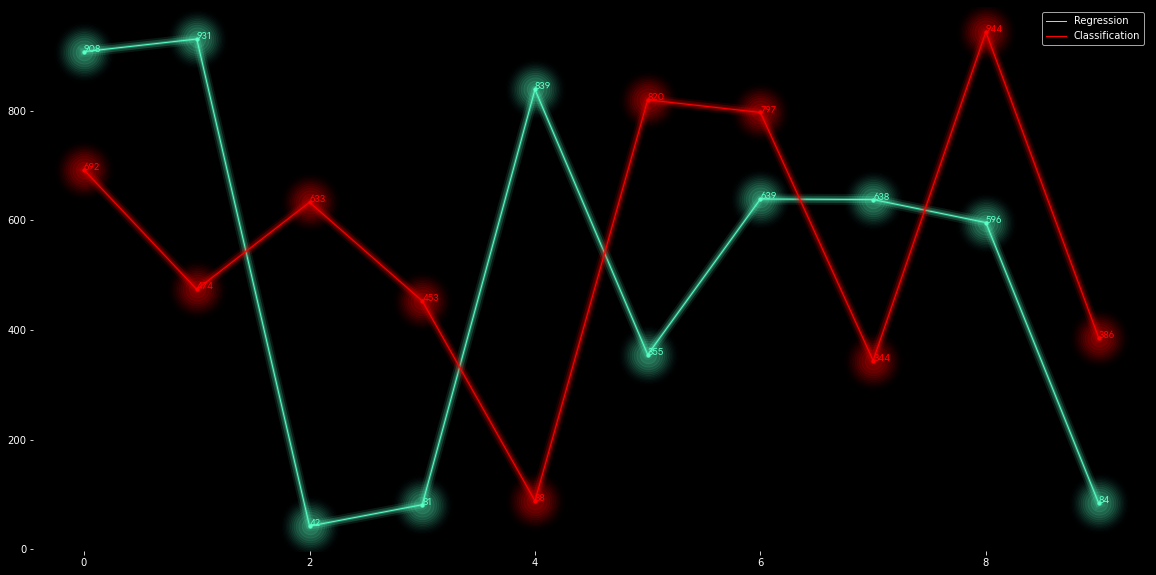

In [163]:
plt.figure(figsize= (20, 10))
lineplot(df[0], figsize= (20, 10), point_marker= 'o', point_size= 4, spines= False,
        font_dict= dict(fontfamily= "product sans", fontsize= 10), 
        show_marks= True, show_values= True, color= colors, legend=True, legend_label="Regression")

lineplot(df[1], figsize= (20, 10), point_marker= 'o', point_size= 4, spines= False,
        font_dict= dict(fontfamily= "product sans", fontsize= 10), 
        show_marks= True, show_values= True, color= 'r', legend=True, legend_label="Classification")

In this current version of Line plot, the text offsets are not being used. Because we need t ofigure out how to add when all data is not given. 

# 

#  KDE

In [169]:
from scipy.stats import gaussian_kde

def kdeplot(x, covariance_factor=.5, fill_alpha=.15, fill=True, spines=True,
             color="#59ffc5", lw=15, ax=None, legend=False, legend_label=None):
    
    ax = ax or plt.gca()
    plot_configure(ax, spines_yn=spines)
    a, b = get_lw(lw=lw)
    
    def plot_it(x, color=color, legend_label=None):
        density = gaussian_kde(x)
        x_min = min(x)
        x_max = max(x)
        xs = np.linspace(x_min - int(x_max * .5), x_max + int(x_max * .5), 2000)
        density.covariance_factor = lambda : covariance_factor
        density._compute_covariance()
        
        for width, alpha in zip(a, b):
            plt.plot(xs, density(xs), color=color, alpha= alpha, lw= width)
        plt.plot(xs, density(xs), color=color, label=legend_label)
        
        if fill:
            plt.fill_between(xs, density(xs), color=color, alpha=fill_alpha)

    
    
    # Checking if X is from list, array, series or tuple (in short not df)
    if not isinstance(x, (pd.DataFrame)):
        colr = color if isinstance(color, str) else color[0]
        plot_it(x, legend_label=legend_label)
        
    # Means DF is passed
    else:
        columns = [*x.columns]
        color = cycle_colors(color)
        for colorId, col in enumerate(columns):
            colr = next(color)
            plot_it(x[col], colr, legend_label=col)
            
    if legend: plt.legend()
    return ax

<AxesSubplot:>

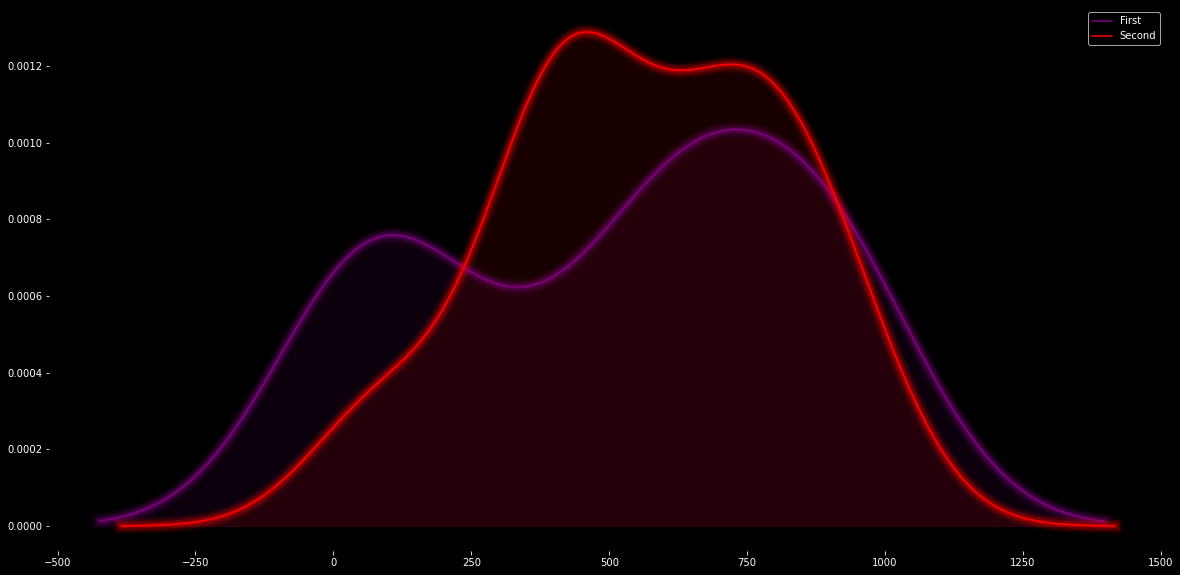

In [172]:
plt.figure(figsize= (20, 10))
kdeplot(df[0], fill=True, fill_alpha=.1, spines=False, lw= 20, color= 'purple', legend=True, legend_label="First")
kdeplot(df[1], fill=True, fill_alpha=.1, spines=False, lw= 20, color= 'r', legend=True, legend_label="Second")

<AxesSubplot:>

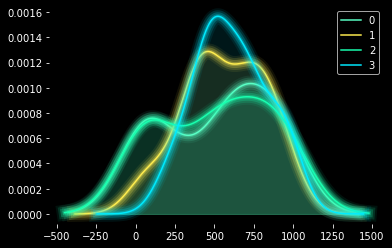

In [177]:
kdeplot(df, fill=True, fill_alpha=.1, spines=False, lw= 20, color= colors, legend=True)

# 

# Scatter

In [7]:
df = pd.DataFrame(np.random.randint(0, 100, (30,2)), index= pd.date_range('25/4/2021', periods= 30))

In [8]:
df.head()

,0,1
2021-04-25,19,61
2021-04-26,17,10
2021-04-27,62,71
2021-04-28,35,87
2021-04-29,78,43


The only possibilities are :
- list / tuple / array / series

And it should be X and Y both and both with numberical values

In [180]:
def scatterplot(x, y, spines=True, point_size=2,
                color="#59ffc5", point_marker='o', font_dict=dict(),
                show_values=None, ax=None, labels=None, legend=False, legend_label=None):
    
    fig = plt.gcf()
    ax = ax or plt.gca()
    font_dict['color'] = color
    plot_configure(ax, spines_yn=spines)
    size, alpha, point = get_point(fig, point_size=point_size)
    
    for size, alpha in zip(size, alpha):
        plt.scatter(x, y, s=size, alpha=alpha, color=color, marker=point_marker)
    plt.scatter(x, y, s=point, color=color, marker=point_marker, label=legend_label)
    
    if show_values == True:
        if not labels:
            for x, y in zip(x, y):
                plt.text(x, y, str(y), **font_dict)
        else:
            values = list(iter(labels))
            if len(values) == len(x):
                for x, y, value in zip(x, y, values):
                    plt.text(x, y, str(value), **font_dict)
            else: raise NotImplementedError("The length is not matching")
                
    
    if legend: plt.legend()        
    return ax

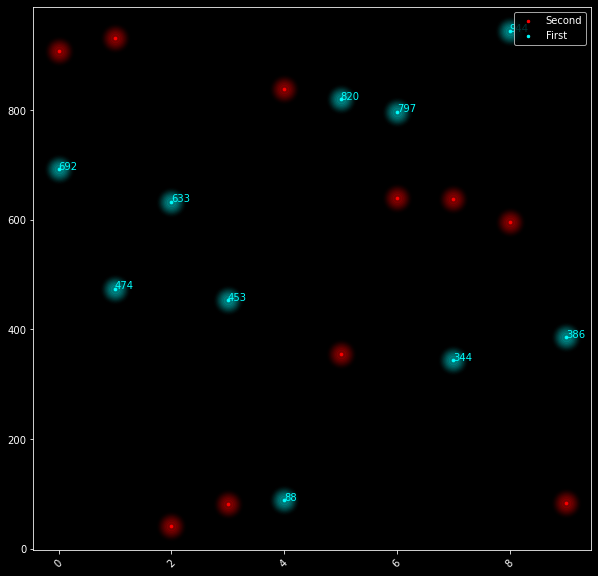

In [189]:
plt.figure(figsize=(10, 10))
scatterplot(df.index, df[0], color='r', legend=True, legend_label="Second")
scatterplot(df.index, df[1], color='cyan', show_values=True, legend=True, legend_label="First")
plt.xticks(rotation= 45);

In [190]:
x = [1,56,2,3,67,32]
y = [4,57,21,33,17,32]
labels = ['India', 'Bharat', 'Hind', 'Indus', 'Hindustan', 'Nation']

<AxesSubplot:>

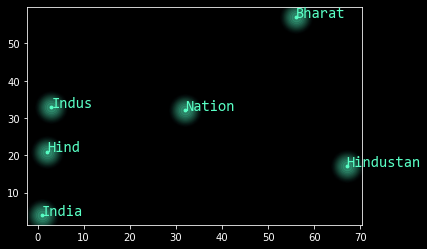

In [191]:
scatterplot(x, y, point_size=10, show_values=True, labels=labels,
            font_dict=dict(fontfamily="consolas", fontsize=15))

# 

# Histogram

In [196]:
data = np.random.randint(0, 10_000, 100)

In [363]:
def histplot(x, spines=True, color="#59ffc5", font_dict=dict(),
             show_values=False, ax=None, bins=None, lw=25, text_offset_xy=(0, 1)):
    
    if isinstance(x, pd.DataFrame):
        print("DataFrames are not supported now. Please provide 1D object - Series/Array/List etc.")
        return
    
    fig = plt.gcf()
    ax = ax or plt.gca()
    plot_configure(ax, spines_yn=spines)
    a, b = get_lw(lw)
    
    for width, alpha in zip(a, b):
        plt.hist(x, edgecolor=color, facecolor= (0, 0, 0, 0), linewidth=width, 
                 alpha=alpha, bins=bins)
    height, locs, _ = plt.hist(x, edgecolor=color, facecolor= (0, 0, 0, 0), bins=bins);
    
    if show_values == True:
        font_dict['color'] = color
        loc_mean = []
        for i in range(len(locs) - 1):
            mean = locs[i:i+2].mean()
            loc_mean.append(mean)
        
        xo, yo = text_offset_xy
        for x, y in zip(loc_mean, height):
            if y > 0: plt.text(x - xo, y - yo, str(int(y)), **font_dict)
        
    return ax

<AxesSubplot:>

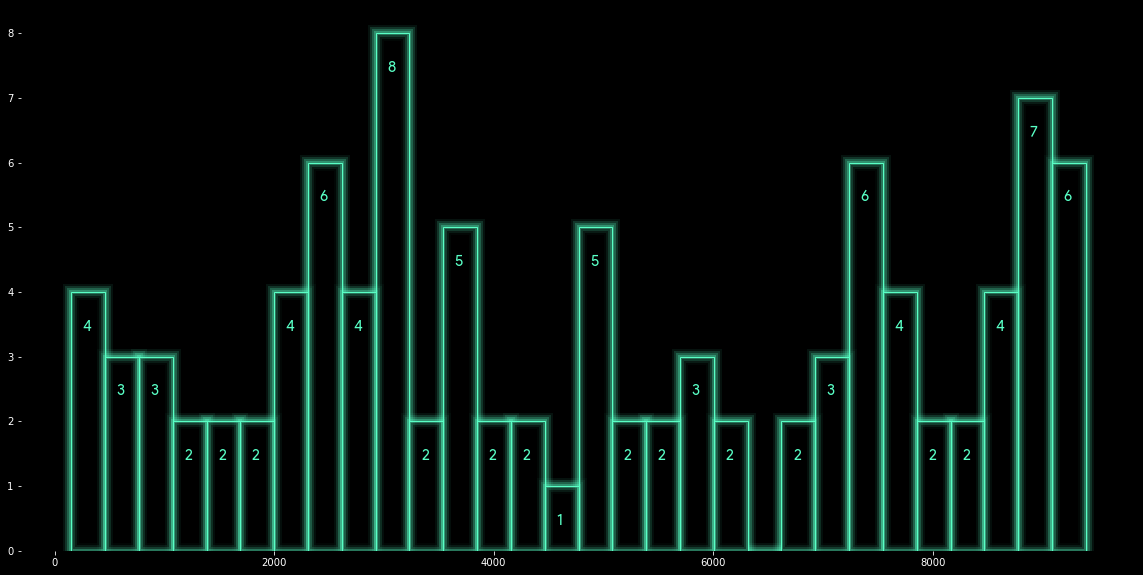

In [366]:
plt.figure(figsize=(20,10))
histplot(data, lw=20, spines=False, show_values=True,
         font_dict=dict(fontfamily='product sans', fontsize=15), bins=30,
         text_offset_xy = (50, 0.6))

# 

The pie chart in neon, doesn't look that will work...

The same goes with box plot... let's see.

# DONE? 

Make Requirements file <br>
Save the versions <br>